PART 1

We will use an API key approach to pull year 2024 exchange rates from the https://v6.exchangerate-api.com/v6 base URL, to convert US Dollar (USD) to EURO (EUR), JAPANESE YEN (JPY), and CHINESE YUAN (CNY).

Due to large amount of API data, this exercise is only to pull rates from 1/1/2024-12/31/2024

In [1]:
# Import dependencies
import requests
import pandas as pd
import datetime as dt
from dotenv import load_dotenv
import os
import json
import time

# Load environment variables and Exchange Rate API key
load_dotenv()
API_KEY = os.getenv("EXCHANGE_RATE_API_KEY")


In [2]:
# Save config information.
BASE_URL = "https://v6.exchangerate-api.com/v6"

# Set base currency 
BASE_CURRENCY = 'USD'

# Set other currencies to convert to Euro, Japanese Yen, and Chinese Yuan
CURRENCIES = ['EUR', 'JPY', 'CNY']


In [3]:
# Print the supported currencies for our small project
print(f"Our Foreign Exchange Currencies Project will convert {BASE_CURRENCY} to the following:")
for currency in CURRENCIES:
    print(f"{BASE_CURRENCY}/{currency}")

# Set the start date for the exchange rate data
start_date = dt.datetime(2024, 1, 1)
end_date = dt.datetime(2024, 12, 31)

# print the start and end date  
print(f"Start date: {start_date.strftime('%m/%d/%Y')}")
print(f"End date: {end_date.strftime('%m/%d/%Y')}")

Our Foreign Exchange Currencies Project will convert USD to the following:
USD/EUR
USD/JPY
USD/CNY
Start date: 01/01/2024
End date: 12/31/2024


In [4]:
# WARNING: This whole cell will take a long time to run (15-30 minutes)

# Create an empty list to store the exchange rates
rates = []
current_date = start_date


# Loop through the currencies and get the exchange rates
while current_date <= end_date:
    for currency in CURRENCIES:
        # Query URL
        url = f"{BASE_URL}/{API_KEY}/history/{BASE_CURRENCY}/{current_date.strftime('%Y/%m/%d')}"
        response = requests.get(url)
        
        # Check if the request was successful
        if response.status_code == 200:
            data = response.json()
            if 'conversion_rates' in data:
                rate_data = {
                    'date': current_date.strftime('%Y-%m-%d'),
                    'currency': currency,
                    'rate': data['conversion_rates'].get(currency)
                }
                rates.append(rate_data)
        
        # Add delay to respect API rate limits
        time.sleep(0.5)
    
    current_date += dt.timedelta(days=1)

# Convert to DataFrame for better visualization
rates_df = pd.DataFrame(rates)

# Display the DataFrame, top 5 rows and bottom 5 rows
display(rates_df.head())
display(rates_df.tail())

,date,currency,rate
0,2024-01-01,EUR,0.905576
1,2024-01-01,JPY,141.161543
2,2024-01-01,CNY,7.119968
3,2024-01-02,EUR,0.905937
4,2024-01-02,JPY,140.894934


,date,currency,rate
1093,2024-12-30,JPY,157.845846
1094,2024-12-30,CNY,7.304934
1095,2024-12-31,EUR,0.960532
1096,2024-12-31,JPY,157.205786
1097,2024-12-31,CNY,7.307146


In [5]:
# Dump the data to a CSV file
rates_df.to_csv('Resources/2024exchange_rates.csv', index=False)

PART 2

Now that we have the rates data being placed into a CSV, the next few codes will use the CSV file and produce conversion rates for year 2024. 
We will now focus on creating an interactive user input to pull rates on any day in 2024, converting USD/EUR, USD/JPY, or USD/CNY

In [6]:
# Load the data from the CSV file
rates_df2 = pd.read_csv('Resources/2024exchange_rates.csv')

In [7]:
# Display the DataFrame, top 5 rows and bottom 5 rows and its info
display(rates_df2.head())
display(rates_df2.tail())
rates_df.info()

,date,currency,rate
0,2024-01-01,EUR,0.905576
1,2024-01-01,JPY,141.161543
2,2024-01-01,CNY,7.119968
3,2024-01-02,EUR,0.905937
4,2024-01-02,JPY,140.894934


,date,currency,rate
1093,2024-12-30,JPY,157.845846
1094,2024-12-30,CNY,7.304934
1095,2024-12-31,EUR,0.960532
1096,2024-12-31,JPY,157.205786
1097,2024-12-31,CNY,7.307146


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1098 non-null   object 
 1   currency  1098 non-null   object 
 2   rate      1098 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.9+ KB


PART 3
* This is the part where we can check what the foreign currency exchange was in 2024 between USD/EUR, USD/JPY, USD/CNY.
* Like a calculator, use it to calculate how much the USD was worth for
* To check if the currency was correct, run the API URL, for example: https://v6.exchangerate-api.com/v6/{your API key}}/history/USD/2024/08/29

In [8]:
# Ask the user for a date between 1/1/2024 and 12/31/2024 in the format MM/DD/YYYY, if the date is not valid, ask again
while True:
    try:
        user_date = dt.datetime.strptime(input("Enter a date between 1/1/2024 and 12/31/2024 in the format MM/DD/YYYY: "), '%m/%d/%Y')
        if user_date < dt.datetime(2024, 1, 1) or user_date > dt.datetime(2024, 12, 31):
            print("Invalid date. Please enter a date between 1/1/2024 and 12/31/2024.")
        else:
            break
    except ValueError:
        print("Invalid date. Please enter a date between 1/1/2024 and 12/31/2024.")

# Ask the user for a currency to convert to, if the currency is not valid, ask again. The options are EUR, JPY, and CNY
while True:
    user_currency = input("Enter a currency to convert to (EUR, JPY, CNY): ")
    if user_currency not in CURRENCIES:
        print("Invalid currency. Please enter a currency from the following: EUR, JPY, CNY.")
    else:
        break

# Display the exchange rate for the selected currency on the selected date
# Using the & ensures both conditions (the currency to convert to and the date) are met
# The .values[0] is used to get the value of the rate from the DataFrame
# Limit displaying the exchange rate to 2 decimal places
exchange_rate = rates_df2[(rates_df2['currency'] == user_currency) & (rates_df2['date'] == user_date.strftime('%Y-%m-%d'))]['rate'].values[0]
print(f"The exchange rate for {user_currency} on {user_date.strftime('%m/%d/%Y')} is {exchange_rate}")

# Ask the user for an amount in USD to convert to the selected currency
while True:
    try:
        user_amount = float(input("Enter an amount in USD to convert: "))
        print(f"Converting {user_amount:.2f} USD to {user_currency} on {user_date.strftime('%m/%d/%Y')} will give you {user_amount * exchange_rate:.2f} {user_currency}")
        break
    except ValueError:
        print("Invalid amount. Please enter a valid number.")



The exchange rate for CNY on 11/23/2024 is 7.25946112
Converting 625.75 USD to CNY on 11/23/2024 will give you 4542.61 CNY


PART 4
Display the 3 countries as a Pivot Table style, as a new DataFrame

In [9]:
# Create a pivot table to show the exchange rates for each currency
rates_pivot_table = rates_df2.pivot(index='date', columns='currency', values='rate')

# Display the pivot table
display(rates_pivot_table)

currency,CNY,EUR,JPY
date,,,
2024-01-01,7.119968,0.905576,141.161543
2024-01-02,7.118441,0.905937,140.894934
2024-01-03,7.137941,0.912635,141.943902
2024-01-04,7.156747,0.915470,143.038350
2024-01-05,7.165128,0.913591,144.495727
...,...,...,...
2024-12-27,7.302884,0.960063,157.768091
2024-12-28,7.302466,0.959720,157.806052
2024-12-29,7.302520,0.959702,157.832499


In [10]:

# Plotting the currency rates in 2024 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline


<Figure size 640x480 with 0 Axes>

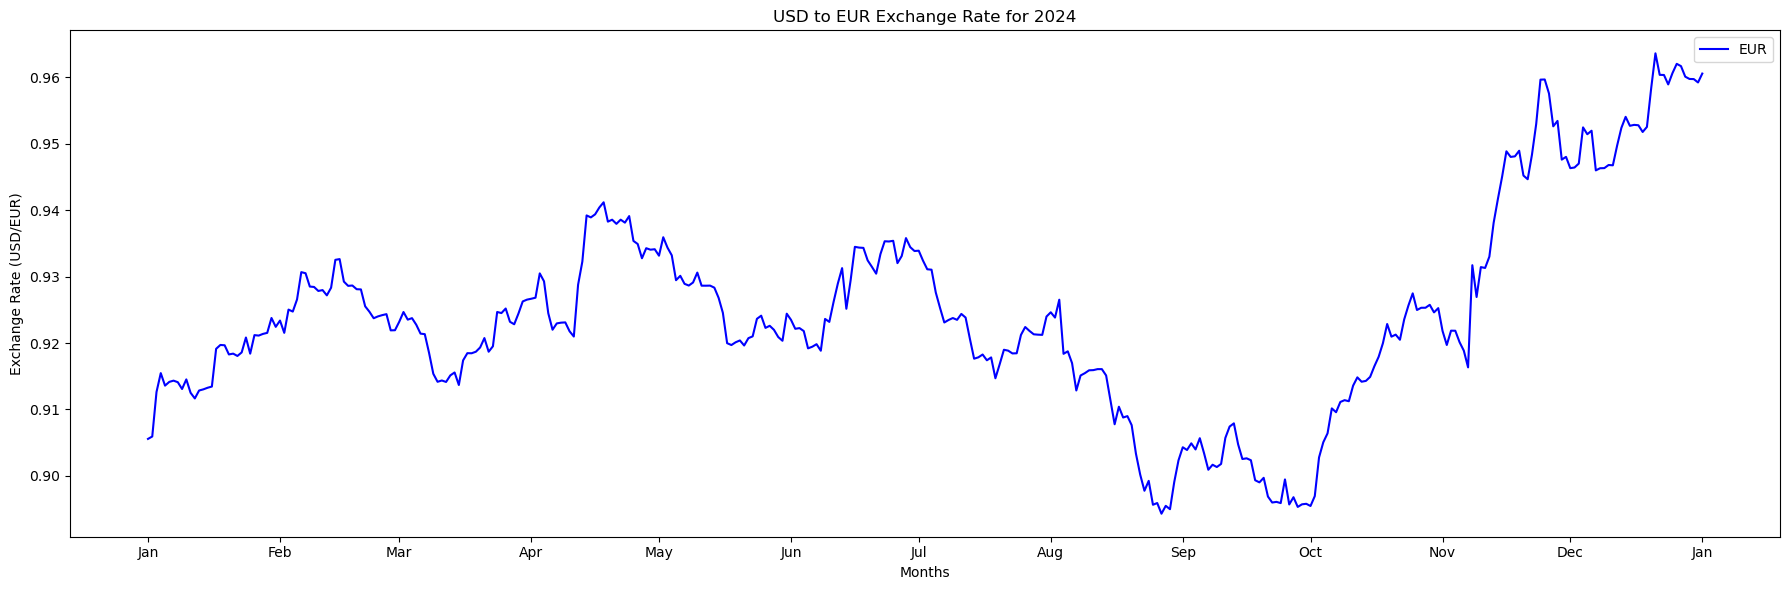

In [11]:
# Display the exchange rate for EUR for each of the month of the year 2024
plt.clf()
plt.figure(figsize=(18, 6))
plt.plot(rates_pivot_table['EUR'], label='EUR', color = 'blue')
plt.title('USD to EUR Exchange Rate for 2024')
plt.xlabel('Months')
plt.ylabel('Exchange Rate (USD/EUR)')

# Set the x-axis to display the months
# ai help here
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as abbreviated month names



#months = pd.date_range(start=rates_pivot_table.index.min(), end=rates_pivot_table.index.max(), freq='ME')

# Set the x-axis labels to display the month and year
#plt.xticks(months, [d.strftime('%b %Y') for d in months], rotation=45)

# Display the chart
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

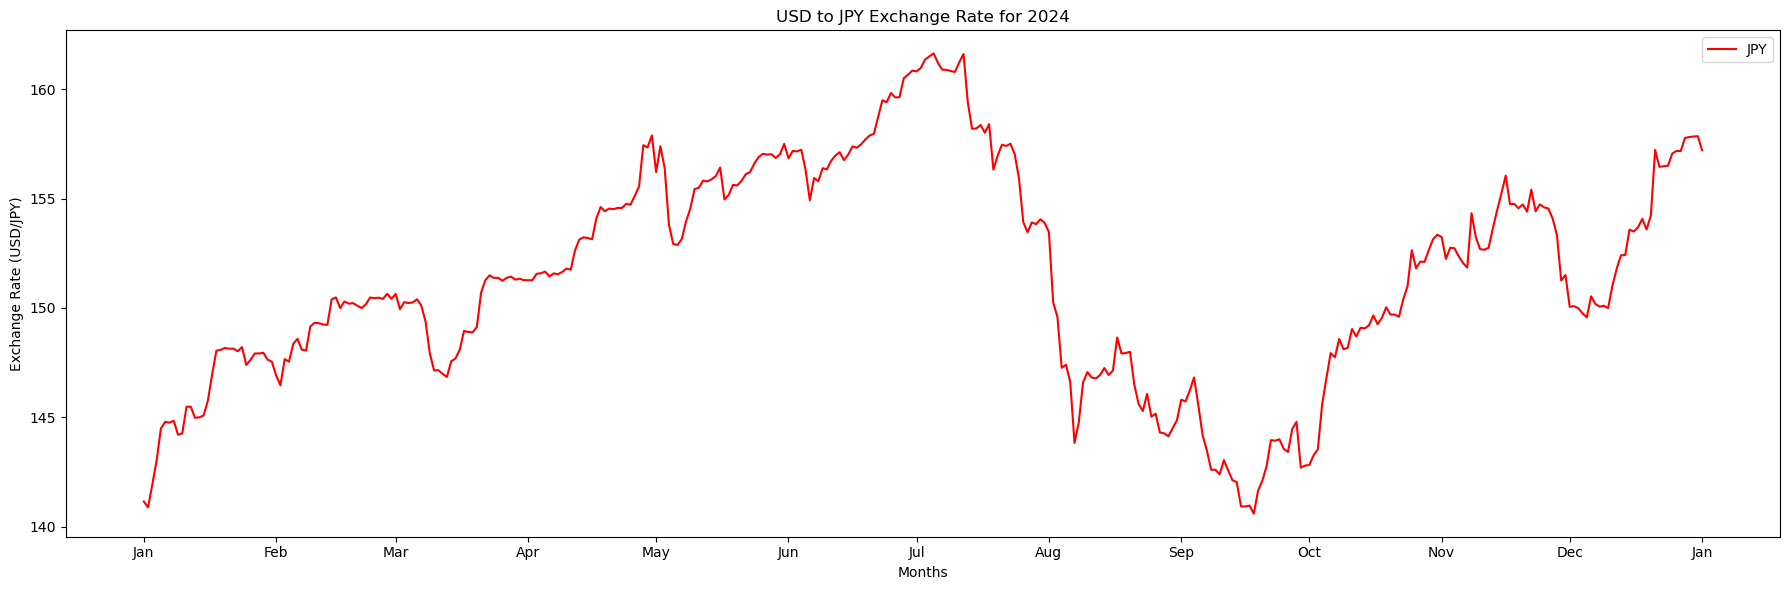

In [12]:
# Display the exchange rate for JPY for each of the month of the year 2024
plt.clf()
plt.figure(figsize=(18, 6))
plt.plot(rates_pivot_table['JPY'], label='JPY', color='red')
plt.title('USD to JPY Exchange Rate for 2024')
plt.xlabel('Months')
plt.ylabel('Exchange Rate (USD/JPY)')

# Set the x-axis to display the months
# ai help here
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as abbreviated month names


# Display the chart
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

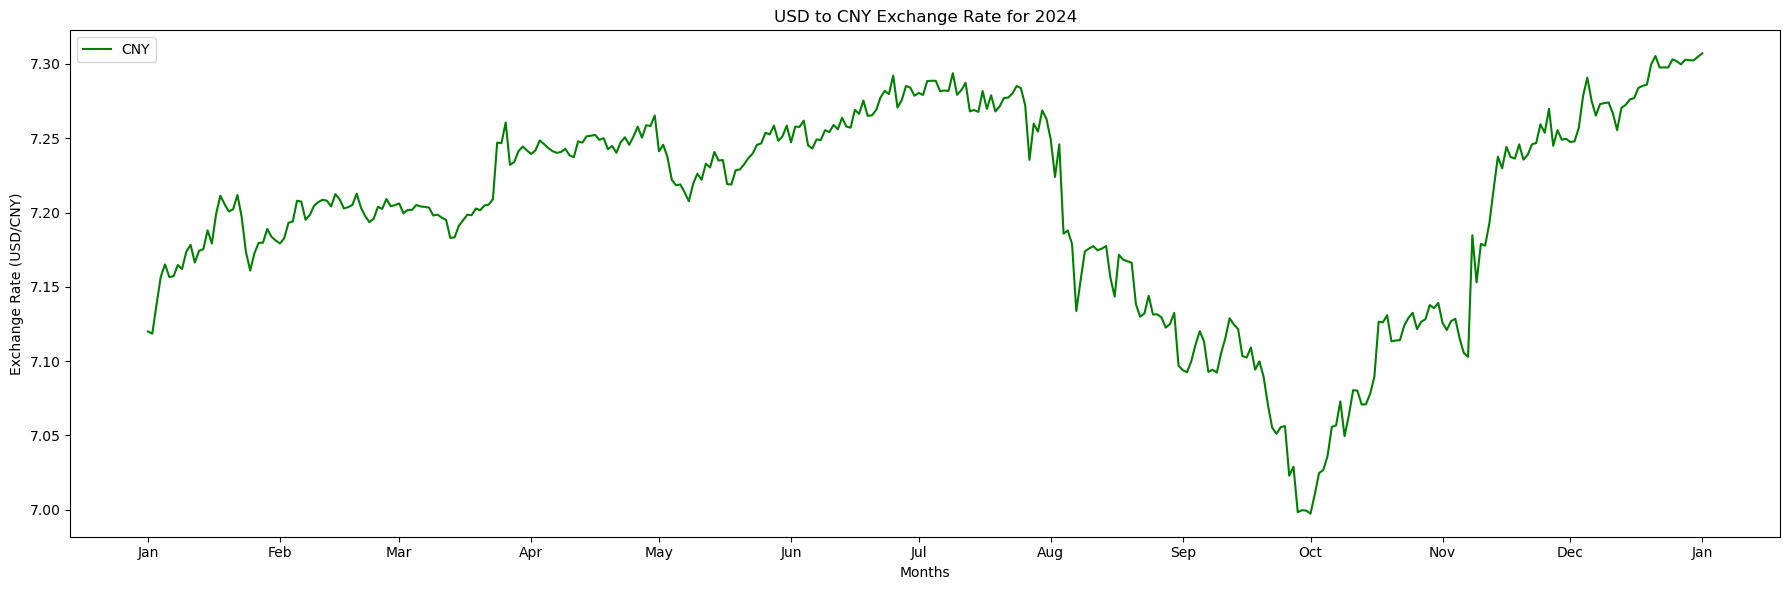

In [13]:
# Display the exchange rate for CNY for each of the month of the year 2024
plt.clf()
plt.figure(figsize=(18, 6))
plt.plot(rates_pivot_table['CNY'], label='CNY', color='green')
plt.title('USD to CNY Exchange Rate for 2024')
plt.xlabel('Months')
plt.ylabel('Exchange Rate (USD/CNY)')

# Set the x-axis to display the months
# ai help here
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as abbreviated month names


# Display the chart
plt.legend()
plt.tight_layout()
plt.show()

PART 5
* Without using the Y values, overlay all 3 charts in one plot

<Figure size 640x480 with 0 Axes>

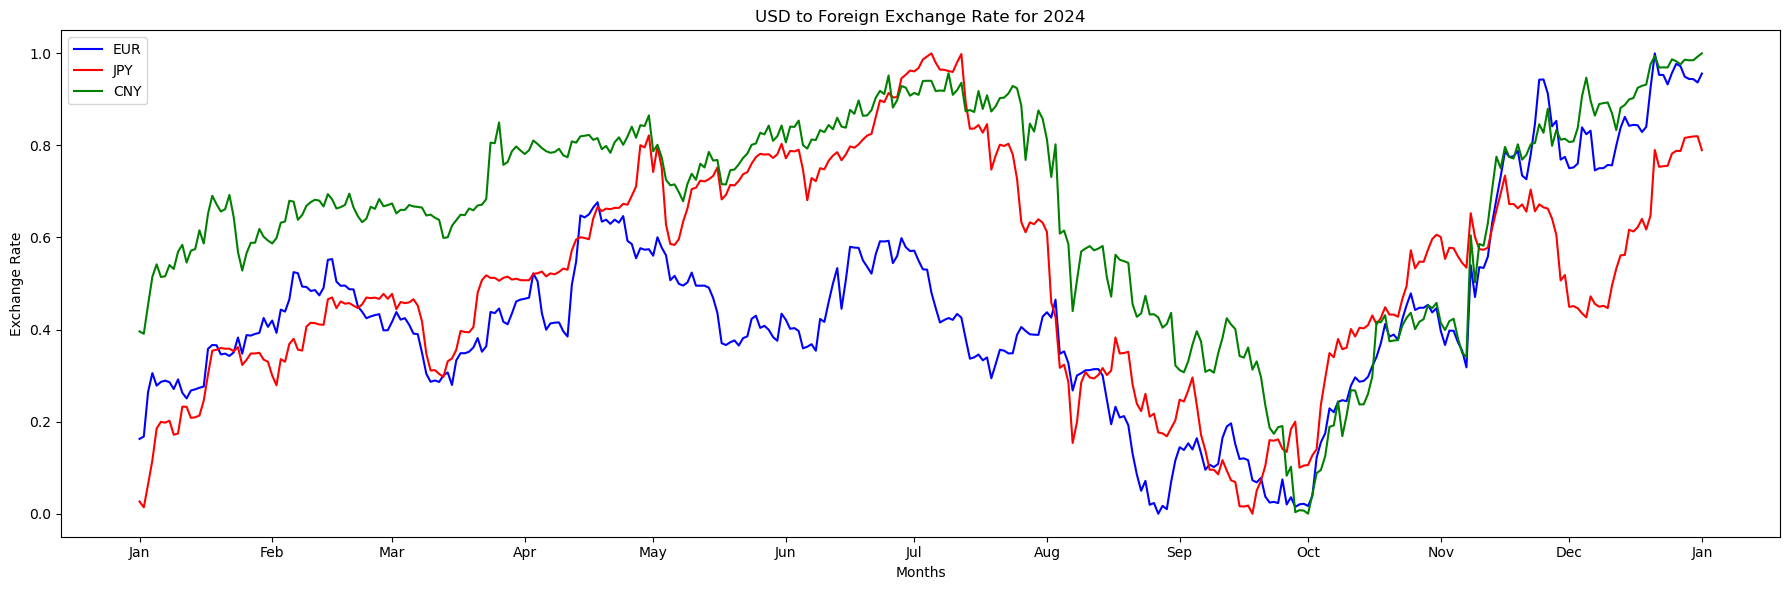

In [14]:
# Assuming rates_pivot_table is already prepared with daily data for EUR, JPY, and CNY
# Normalize the exchange rates using Min-Max Scaling
# ai help here
normalized_rates = rates_pivot_table.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


plt.clf()
plt.figure(figsize=(18, 6))
plt.plot(normalized_rates.index, normalized_rates['EUR'], label='EUR', color='blue')
plt.plot(normalized_rates.index, normalized_rates['JPY'], label='JPY', color='red')
plt.plot(normalized_rates.index, normalized_rates['CNY'], label='CNY', color='green')
plt.title('USD to Foreign Exchange Rate for 2024')
plt.xlabel('Months')
plt.ylabel('Exchange Rate')
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as abbreviated month names
plt.legend()
plt.tight_layout()
plt.show()
